In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('input/train.csv')
df.head(2)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.86,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.91,0.492719,0.71760,6.5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [29]:
train_val, test = train_test_split(df, test_size=0.2, random_state=0)

In [30]:
train_val.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

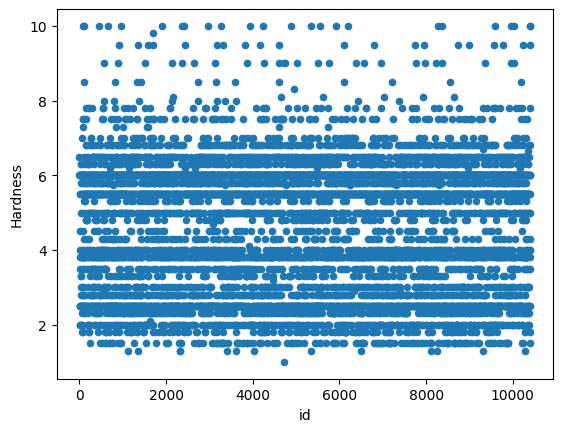

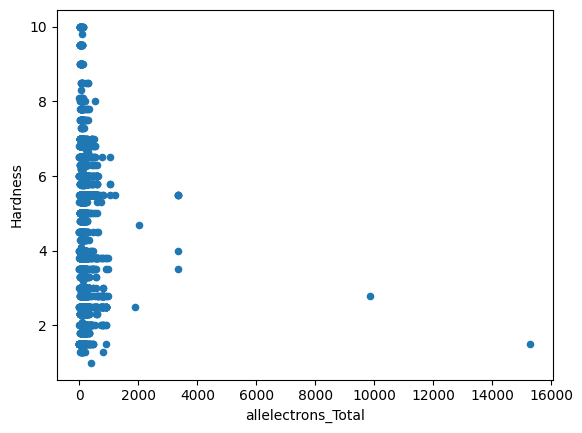

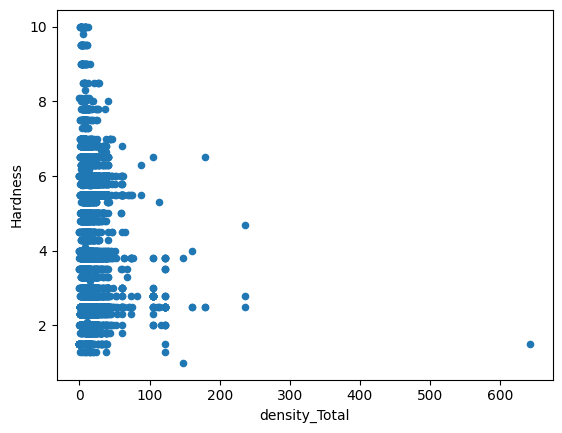

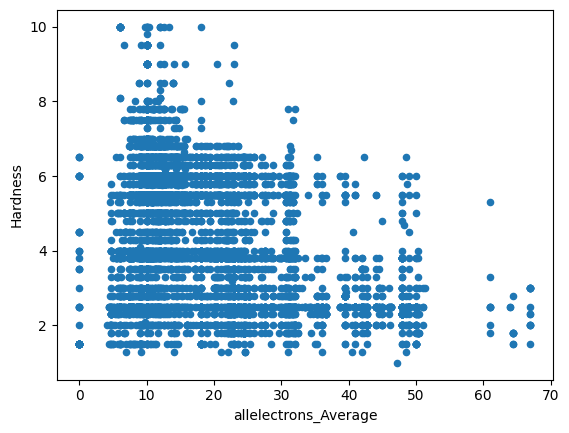

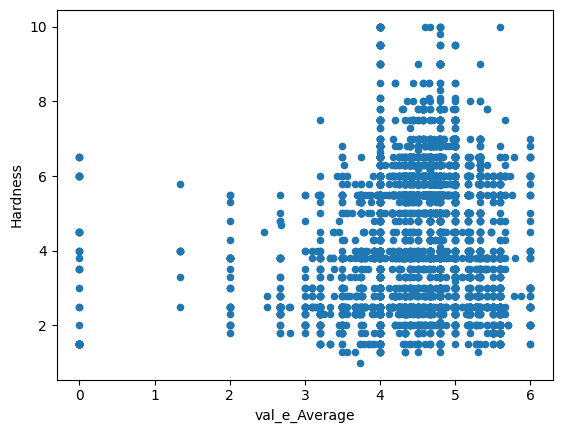

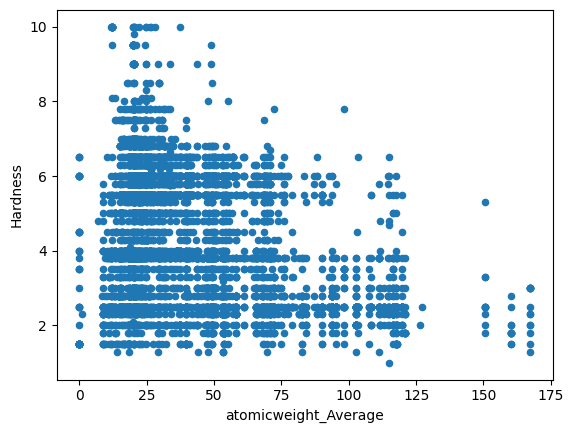

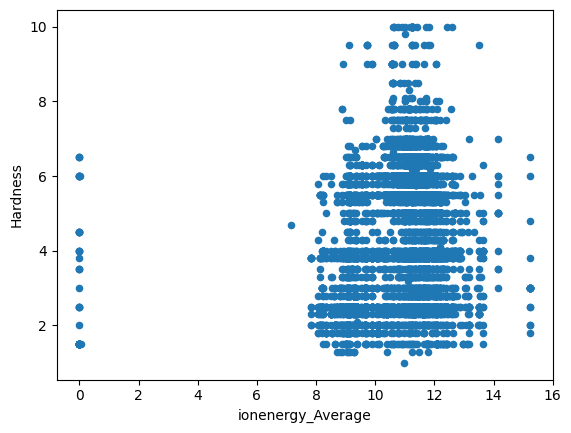

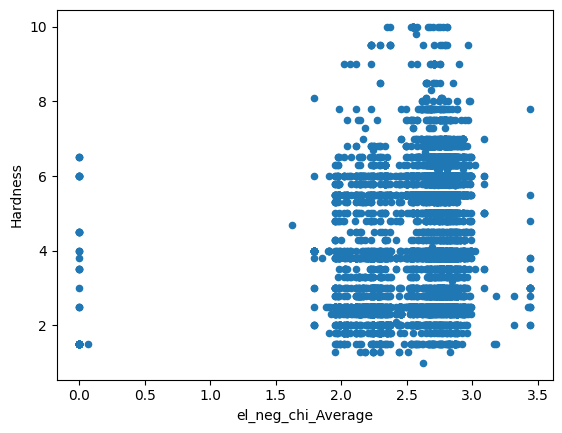

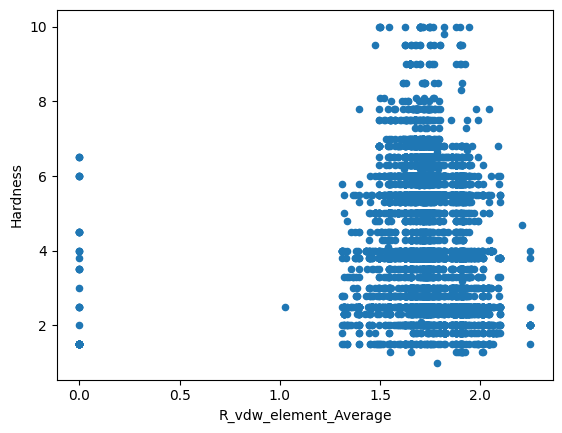

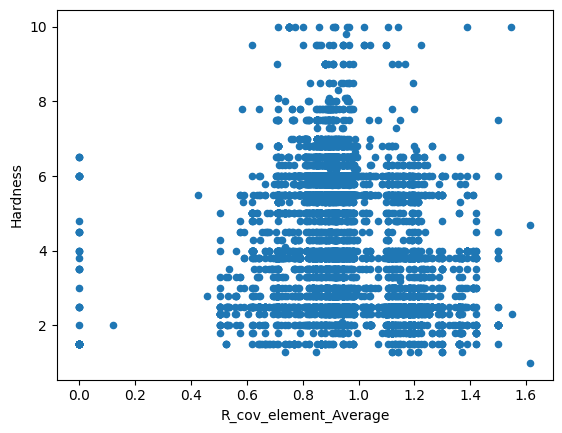

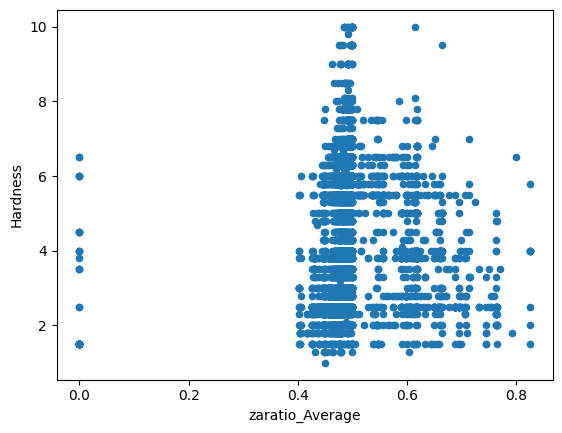

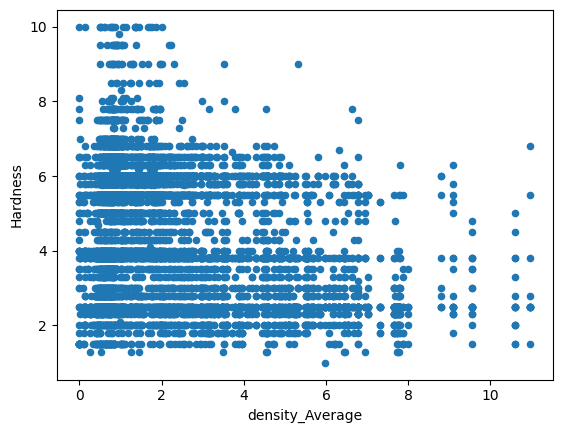

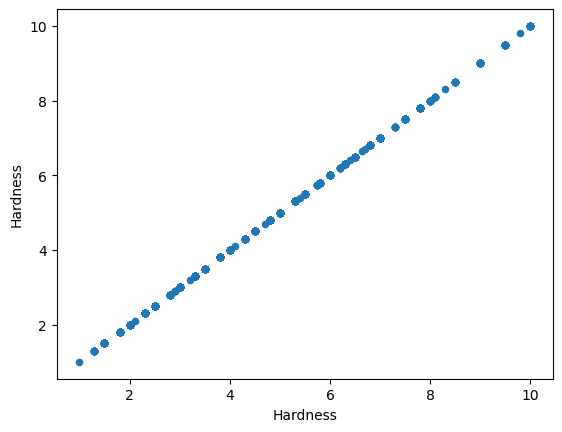

In [31]:
colname = train_val.columns

for name in colname:
    train_val.plot(kind='scatter', x=name, y='Hardness')

In [32]:
col = [
    'allelectrons_Total',
    'density_Total',
    'allelectrons_Average',
    'val_e_Average',
    'atomicweight_Average',
    'ionenergy_Average',
    'Hardness'
]

train_val4 = train_val[col]
train_val4.head(2)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,Hardness
627,243.0,18.206485,10.500000,3.625000,20.994127,11.260331,5.0
8917,156.0,11.354575,17.333333,4.666667,39.987667,11.654067,6.0


In [33]:
train_val4.corr()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,Hardness
allelectrons_Total,1.000000,0.616148,0.070586,0.067913,0.074221,0.033965,-0.061591
density_Total,0.616148,1.000000,0.348686,0.085110,0.348405,-0.098251,-0.160933
allelectrons_Average,0.070586,0.348686,1.000000,-0.002056,0.990928,-0.348021,-0.400289
val_e_Average,0.067913,0.085110,-0.002056,1.000000,-0.005184,0.457587,0.162929
atomicweight_Average,0.074221,0.348405,0.990928,-0.005184,1.000000,-0.345347,-0.402378
ionenergy_Average,0.033965,-0.098251,-0.348021,0.457587,-0.345347,1.000000,0.202310
Hardness,-0.061591,-0.160933,-0.400289,0.162929,-0.402378,0.202310,1.000000


In [34]:
train_cor = train_val4.corr()["Hardness"]
train_cor

allelectrons_Total     -0.061591
density_Total          -0.160933
allelectrons_Average   -0.400289
val_e_Average           0.162929
atomicweight_Average   -0.402378
ionenergy_Average       0.202310
Hardness                1.000000
Name: Hardness, dtype: float64

In [35]:
abs_cor = train_cor.map(abs)
abs_cor

allelectrons_Total      0.061591
density_Total           0.160933
allelectrons_Average    0.400289
val_e_Average           0.162929
atomicweight_Average    0.402378
ionenergy_Average       0.202310
Hardness                1.000000
Name: Hardness, dtype: float64

In [36]:
abs_cor.sort_values(ascending=False)

Hardness                1.000000
atomicweight_Average    0.402378
allelectrons_Average    0.400289
ionenergy_Average       0.202310
val_e_Average           0.162929
density_Total           0.160933
allelectrons_Total      0.061591
Name: Hardness, dtype: float64

In [37]:
col = ['atomicweight_Average', 'ionenergy_Average', 'val_e_Average']
x = train_val4[col]
t = train_val4[['Hardness']]

x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

sc_x = sc_model_x.transform(x_train)
sc_x

array([[-0.5895338 ,  0.23195364, -0.77414412],
       [ 0.45267243, -0.60410738, -0.77414412],
       [-0.49014503,  0.10929376,  0.3794527 ],
       ...,
       [-0.43685804,  0.31751948,  0.3794527 ],
       [ 0.24094651, -1.26964296, -2.21614014],
       [ 3.04541127, -1.35173344, -0.77414412]])

In [39]:
tmp_df = pd.DataFrame(sc_x, columns=x_train.columns)
tmp_df.mean()

atomicweight_Average   -5.334405e-17
ionenergy_Average       1.085551e-15
val_e_Average           2.189773e-16
dtype: float64

In [40]:
tmp_df.std()

atomicweight_Average    1.000075
ionenergy_Average       1.000075
val_e_Average           1.000075
dtype: float64

In [41]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [42]:
model = LinearRegression()
model.fit(sc_x, sc_y)


LinearRegression()

In [43]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)

print(model.score(sc_x_val, sc_y_val))

0.14937319660823123


In [44]:
def learn(x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)

    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)

    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)

    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)

    return train_score, val_score

In [45]:
x = train_val.loc[:, 'allelectrons_Total':'density_Average']
t = train_val[['Hardness']]

s1, s2 = learn(x, t)
print(s1, s2)

0.2497782630594101 0.210021344024947
